In [1]:
import math
import numpy as np
import graphviz
import matplotlib.pyplot as plt
from gradient_engine.core import Value
from gradient_engine.nn import Neuron, MLP, Layer
from gradient_engine.utils import draw_dot
%matplotlib inline

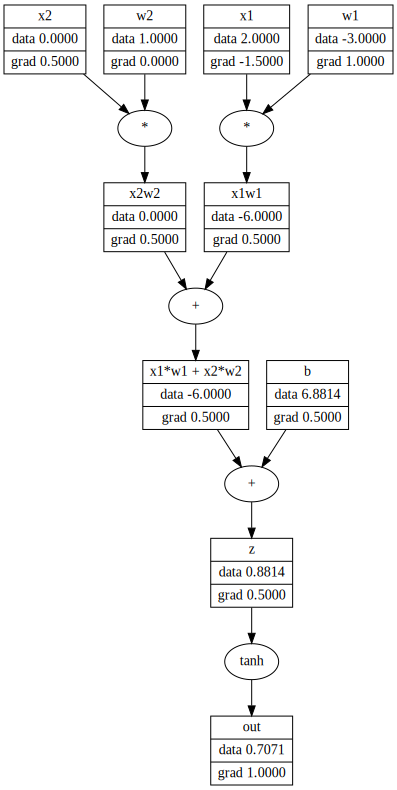

In [2]:

# a simple neuron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
z = x1w1x2w2 + b; z.label="z"

out = z.tanh(); out.label="out"
out.backward()
draw_dot(out)

In [3]:
import torch

x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True

w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True

b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True
n = x1 * w1 + x2 * w2 + b

o = torch.tanh(n)

o.backward()
print('--------------')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

--------------
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


[Value(data=-0.890543952732403), Value(data=-0.6319752156995482), Value(data=0.7045422133276229)]


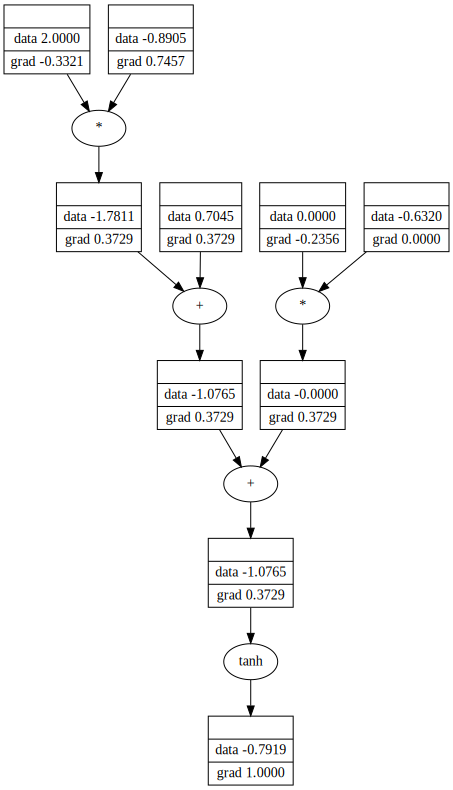

In [5]:
# a simple neuron
x = [2, 0]
n = Neuron(2)
out = n(x)
print(n.parameters())
out.backward()
draw_dot(out)

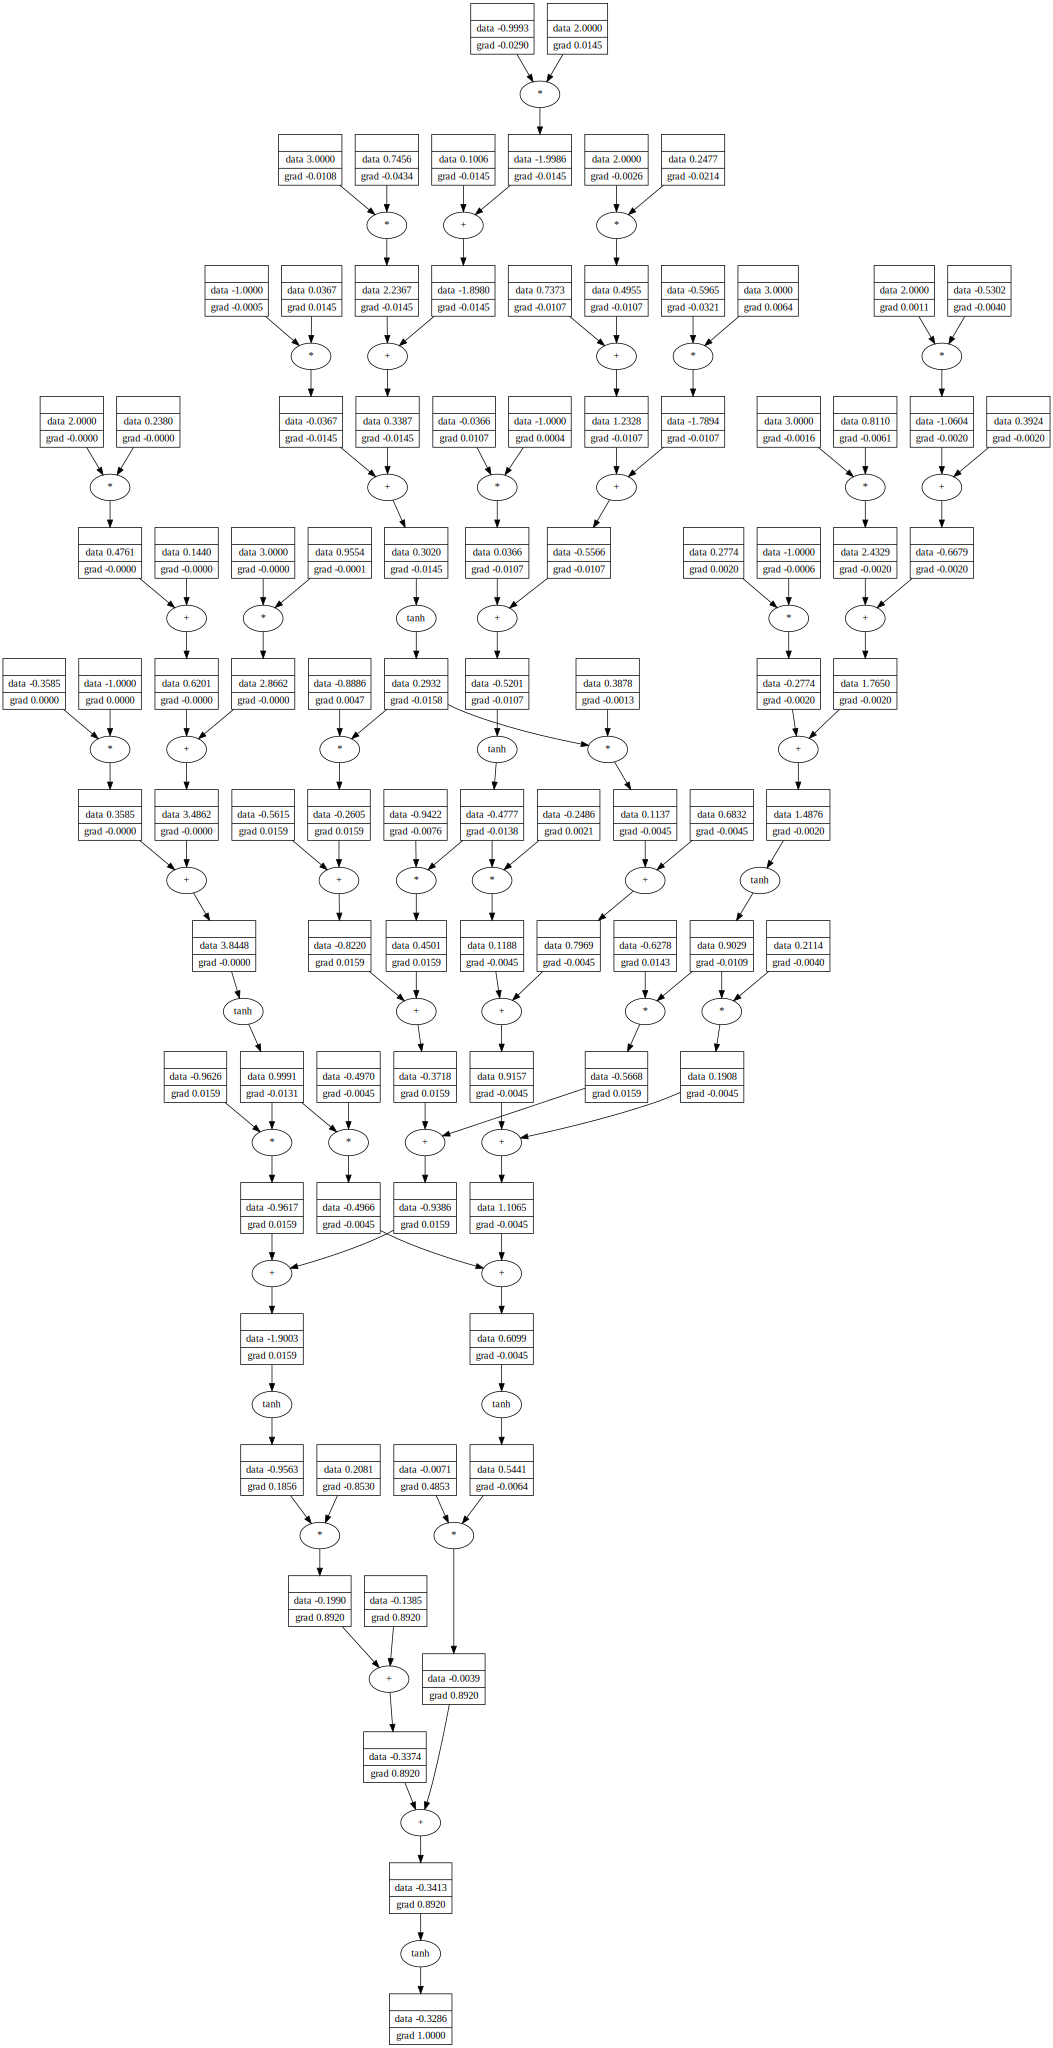

In [51]:
x = [2.0, 3.0, -1.0]
n = MLP([3, 4, 2, 1])
out = n(x)
out.backward()
draw_dot(out)


# Training a Neural Network

In [53]:

# Example Usage
model = MLP([3, 4, 2, 1])
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]

y_pred = [model(x) for x in xs]
y_pred

[Value(data=0.2801804771425914),
 Value(data=0.28333971546855763),
 Value(data=0.02693914654773039),
 Value(data=0.19705542112387986)]

In [64]:
train_loss = []
lr = 1e-3

for i in range(3000):
    
    # forward pass
    y_pred = [model(x) for x in xs]
    loss = [(y_out - ygt)**2 for ygt, y_out in zip(ys, y_pred)]
    loss = sum(loss)
    
    # zero out the grads
    for p in model.parameters():
        p.grad = 0.0
        
    # backward pass
    loss.backward()
    train_loss.append(loss.data)
    
    # update the gradients
    for p in model.parameters():
        p.data += lr * (-p.grad)
    

[Value(data=0.9350058999157811), Value(data=-0.920817465252563), Value(data=-0.9330892981076724), Value(data=0.9225934165234954)]


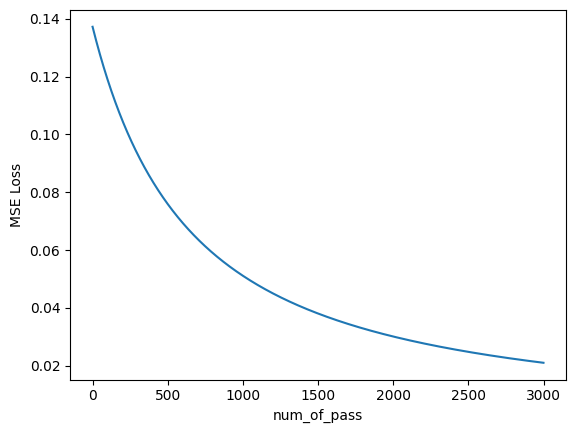

In [65]:
plt.plot(train_loss)
plt.xlabel("num_of_pass")
plt.ylabel("MSE Loss")
print(y_pred)